In [26]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [27]:
# Read Datafile 
df = pd.read_csv('C:/Users/tvish/Downloads/coding/FBLA Air Quality Project/FBLA air quality.csv') 

# Makes sure 'Start_Date' column is in datetime format
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

In [5]:
# Prints column names as a list
print(df.columns.tolist())

['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period', 'Start_Date', 'Data Value', 'Message']


In [6]:
# Finds unique values of Indicator ID and Name 
print(df[['Indicator ID', 'Name', 'Measure Info']].drop_duplicates())

       Indicator ID                                               Name  \
0               640              Boiler Emissions- Total SO2 Emissions   
2               365                            Fine particles (PM 2.5)   
26              375                             Nitrogen dioxide (NO2)   
187             648    Asthma emergency department visits due to PM2.5   
568             643                      Annual vehicle miles traveled   
609             657    Asthma emergency department visits due to PM2.5   
687             650  Respiratory hospitalizations due to PM2.5 (age...   
723             386                                         Ozone (O3)   
1120            661               Asthma hospitalizations due to Ozone   
4489            642              Boiler Emissions- Total NOx Emissions   
4553            641            Boiler Emissions- Total PM2.5 Emissions   
5191            647                  Outdoor Air Toxics - Formaldehyde   
6213            659   Asthma emergency

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/tvish/Downloads/coding/FBLA Air Quality Project/FBLA air quality.csv')

# Convert 'Start_Date' column to datetime format for easy comparison
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

# Filter for each specific category and find the earliest and latest dates for each

categories = [
    "Boiler Emissions- Total SO2 Emissions", 
    "Fine particles (PM 2.5)", 
    "Nitrogen dioxide (NO2)", 
    "Asthma emergency department visits due to PM2.5", 
    "Annual vehicle miles traveled", 
    "Asthma emergency department visits due to PM2.5", 
    "Respiratory hospitalizations due to PM2.5", 
    "Ozone (O3)", 
    "Asthma hospitalizations due to Ozone", 
    "Boiler Emissions- Total NOx Emissions", 
    "Boiler Emissions- Total PM2.5 Emissions", 
    "Outdoor Air Toxics - Formaldehyde", 
    "Asthma emergency departments visits due to Ozone", 
    "Asthma emergency departments visits due to Ozone", 
    "Asthma hospitalizations due to Ozone", 
    "Cardiovascular hospitalizations due to PM2.5", 
    "Cardiac and respiratory deaths due to Ozone", 
    "Deaths due to PM2.5", 
    "Outdoor Air Toxics - Benzene", 
    "Annual vehicle miles traveled (trucks)", 
    "Annual vehicle miles traveled (cars)"
]

# Loop through categories and print earliest and latest dates for each
for category in categories:
    category_df = df[df['Name'] == category]
    
    # Check if the category exists in the data
    if not category_df.empty:
        earliest_date = category_df['Start_Date'].min()
        latest_date = category_df['Start_Date'].max()
        print(f"{category}:")
        print(f"  Earliest occurrence: {earliest_date}")
        print(f"  Latest occurrence: {latest_date}")
        print("-" * 50)
    else:
        print(f"{category} not found in the dataset.\n")


Boiler Emissions- Total SO2 Emissions:
  Earliest occurrence: 2013-01-01 00:00:00
  Latest occurrence: 2015-01-01 00:00:00
--------------------------------------------------
Fine particles (PM 2.5):
  Earliest occurrence: 2008-12-01 00:00:00
  Latest occurrence: 2022-06-01 00:00:00
--------------------------------------------------
Nitrogen dioxide (NO2):
  Earliest occurrence: 2008-12-01 00:00:00
  Latest occurrence: 2022-06-01 00:00:00
--------------------------------------------------
Asthma emergency department visits due to PM2.5:
  Earliest occurrence: 2005-01-01 00:00:00
  Latest occurrence: 2017-01-01 00:00:00
--------------------------------------------------
Annual vehicle miles traveled:
  Earliest occurrence: 2005-01-01 00:00:00
  Latest occurrence: 2019-01-01 00:00:00
--------------------------------------------------
Asthma emergency department visits due to PM2.5:
  Earliest occurrence: 2005-01-01 00:00:00
  Latest occurrence: 2017-01-01 00:00:00
------------------------

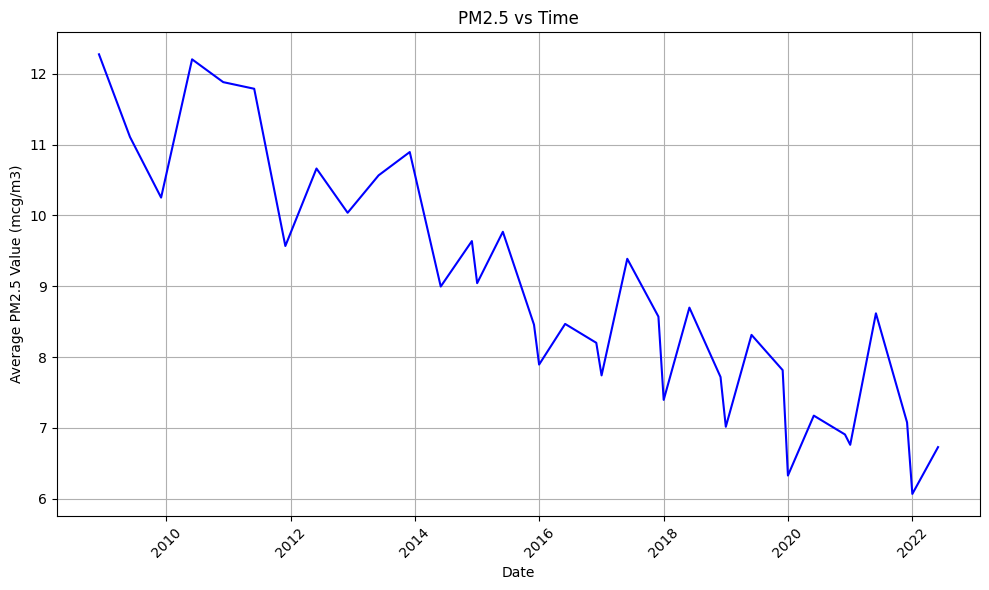

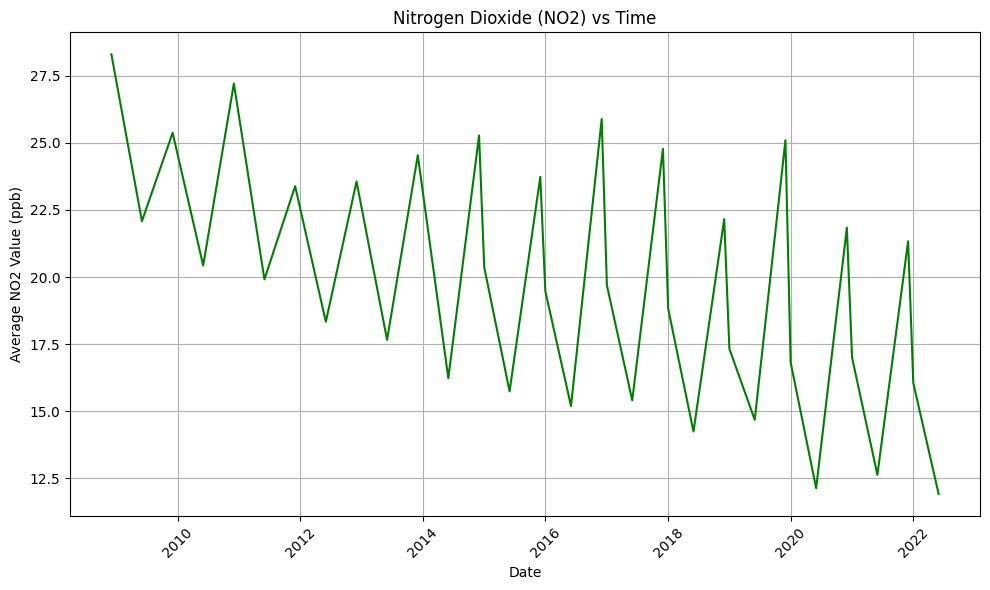

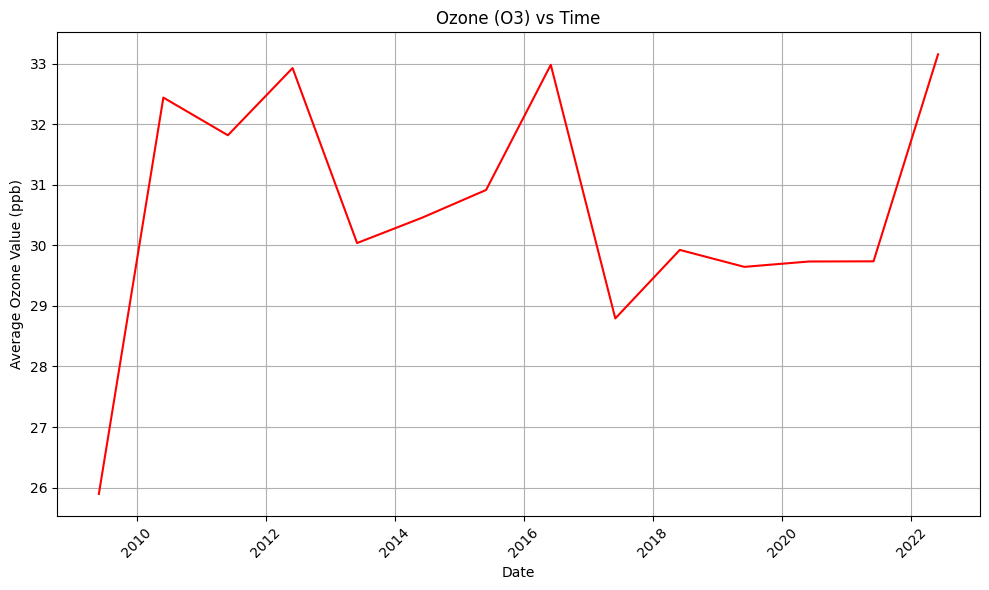

In [8]:
# Filter for PM2.5 data
pm25_df = df[df['Name'] == 'Fine particles (PM 2.5)']
# Group by date and get the mean for each day
pm25_df_grouped = pm25_df.groupby(pm25_df['Start_Date'].dt.date)['Data Value'].mean()

# Filter for NO2 data
no2_df = df[df['Name'] == 'Nitrogen dioxide (NO2)']
# Group by date and get the mean for each day
no2_df_grouped = no2_df.groupby(no2_df['Start_Date'].dt.date)['Data Value'].mean()

# Filter for Ozone data
ozone_df = df[df['Name'] == 'Ozone (O3)']
# Group by date and get the mean for each day
ozone_df_grouped = ozone_df.groupby(ozone_df['Start_Date'].dt.date)['Data Value'].mean()

# Plot PM2.5
plt.figure(figsize=(10, 6))
plt.plot(pm25_df_grouped.index, pm25_df_grouped.values, label='PM2.5', color='blue')
plt.title('PM2.5 vs Time')
plt.xlabel('Date')
plt.ylabel('Average PM2.5 Value (mcg/m3)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig('PM25_vs_Time.png')
plt.show()

# Plot NO2
plt.figure(figsize=(10, 6))
plt.plot(no2_df_grouped.index, no2_df_grouped.values, label='NO2', color='green')
plt.title('Nitrogen Dioxide (NO2) vs Time')
plt.xlabel('Date')
plt.ylabel('Average NO2 Value (ppb)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig('NO2_vs_Time.png')
plt.show()

# Plot Ozone
plt.figure(figsize=(10, 6))
plt.plot(ozone_df_grouped.index, ozone_df_grouped.values, label='Ozone (O3)', color='red')
plt.title('Ozone (O3) vs Time')
plt.xlabel('Date')
plt.ylabel('Average Ozone Value (ppb)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig('Ozone_vs_Time.png')
plt.show()



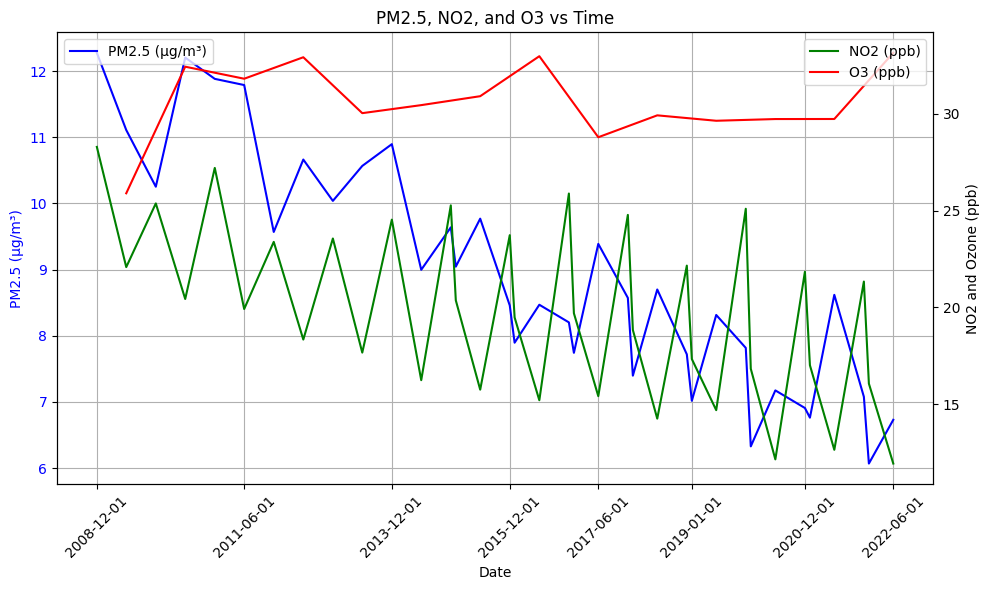

In [10]:
# Filter for PM2.5 data
pm25_df = df[df['Name'] == 'Fine particles (PM 2.5)']
# Group by date and get the mean for each day
pm25_df_grouped = pm25_df.groupby(pm25_df['Start_Date'].dt.date)['Data Value'].mean()

# Filter for NO2 data
no2_df = df[df['Name'] == 'Nitrogen dioxide (NO2)']
# Group by date and get the mean for each day
no2_df_grouped = no2_df.groupby(no2_df['Start_Date'].dt.date)['Data Value'].mean()

# Filter for Ozone data
ozone_df = df[df['Name'] == 'Ozone (O3)']
# Group by date and get the mean for each day
ozone_df_grouped = ozone_df.groupby(ozone_df['Start_Date'].dt.date)['Data Value'].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 data on the primary axis (left axis)
ax1.plot(pm25_df_grouped.index, pm25_df_grouped.values, label='PM2.5 (µg/m³)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary axis (right axis) for NO2 and Ozone
ax2 = ax1.twinx()
ax2.plot(no2_df_grouped.index, no2_df_grouped.values, label='NO2 (ppb)', color='green')
ax2.plot(ozone_df_grouped.index, ozone_df_grouped.values, label='O3 (ppb)', color='red')
ax2.set_ylabel('NO2 and Ozone (ppb)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add title and grid
plt.title('PM2.5, NO2, and O3 vs Time')
ax1.grid(True)

# Show more labels for time by adjusting tick frequency
ax1.set_xticks(pm25_df_grouped.index[::5])  # Show every 5th date for better label visibility
ax1.set_xticklabels(pm25_df_grouped.index[::5], rotation=45)  # Rotate labels for better readability

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('AirQuality_vs_Time.png')

# Show the plot
plt.show()


In [ ]:
# Print the column names of the shapefile (gdf)
print(gdf.columns)

# Print the column names of the air quality data (df)
print(df.columns)


<Figure size 1400x1200 with 0 Axes>

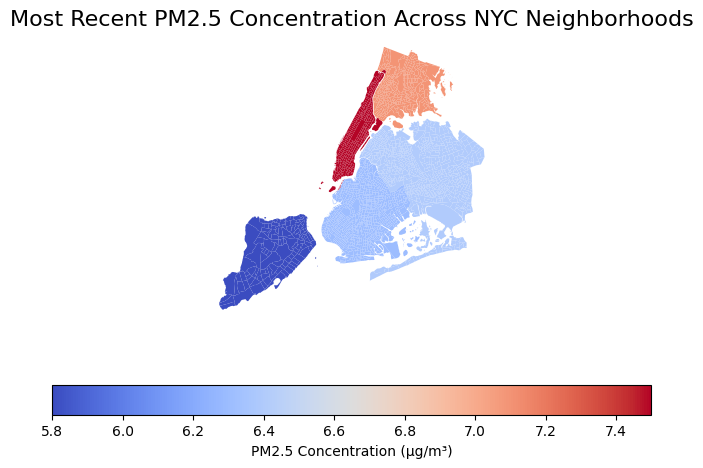

<Figure size 1400x1200 with 0 Axes>

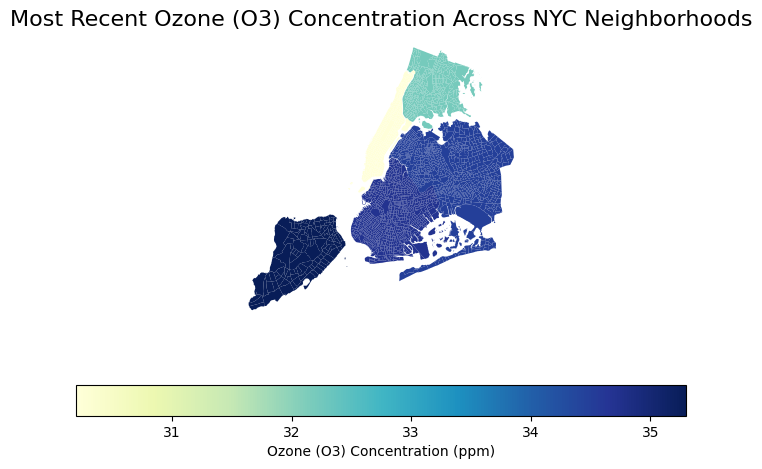

<Figure size 1400x1200 with 0 Axes>

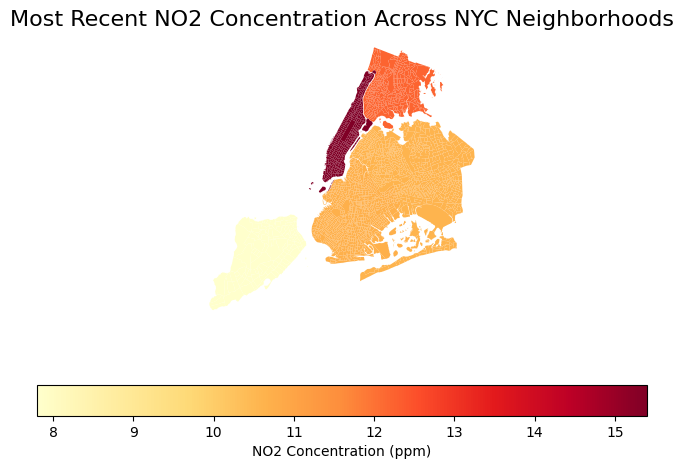

In [23]:
#Filter for PM2.5 data
pm25_df = df[df['Name'] == 'Fine particles (PM 2.5)']
#Get the most recent PM2.5 concentration for each borough
most_recent_pm25_df = pm25_df.loc[pm25_df.groupby('Geo Place Name')['Start_Date'].idxmax()]

#Filter for Ozone (O3) data
ozone_df = df[df['Name'] == 'Ozone (O3)']
#Get the most recent Ozone (O3) concentration for each borough
most_recent_ozone_df = ozone_df.loc[ozone_df.groupby('Geo Place Name')['Start_Date'].idxmax()]

#Filter for NO2 data
no2_df = df[df['Name'] == 'Nitrogen dioxide (NO2)']
#Get the most recent NO2 concentration for each borough
most_recent_no2_df = no2_df.loc[no2_df.groupby('Geo Place Name')['Start_Date'].idxmax()]

#Load the NYC shapefile
nyc_shapefile = 'C:/Users/tvish/Downloads/FBLA Data Analysis/nyct2020.shp'  # Replace with actual file path
gdf = gpd.read_file(nyc_shapefile)

# Create a function to plot the most recent concentrations for each pollutant
def plot_pollutant_map(pollutant_df, pollutant_name, color_map, output_filename, units):
    # Merge the most recent data for the pollutant with the shapefile
    merged_gdf = gdf.merge(pollutant_df, left_on='BoroName', right_on='Geo Place Name', how='left')

    # Plot the map
    plt.figure(figsize=(14, 12))
    merged_gdf.plot(column='Data Value', cmap=color_map, legend=True,
                    legend_kwds={'label': f"{pollutant_name} Concentration ({units})", 'orientation': "horizontal"})

    # Remove longitude and latitude axes
    plt.axis('off')

    # Add title
    plt.title(f'Most Recent {pollutant_name} Concentration Across NYC Neighborhoods', fontsize=16)

    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(output_filename, format='png')

    # Show the plot
    plt.show()

# Plot maps for PM2.5, Ozone, and NO2
plot_pollutant_map(most_recent_pm25_df, 'PM2.5', 'coolwarm', 'nyc_most_recent_pm25_pollutant_map.png', 'µg/m³')
plot_pollutant_map(most_recent_ozone_df, 'Ozone (O3)', 'YlGnBu', 'nyc_most_recent_ozone_pollutant_map.png', 'ppm')
plot_pollutant_map(most_recent_no2_df, 'NO2', 'YlOrRd', 'nyc_most_recent_no2_pollutant_map.png', 'ppm')



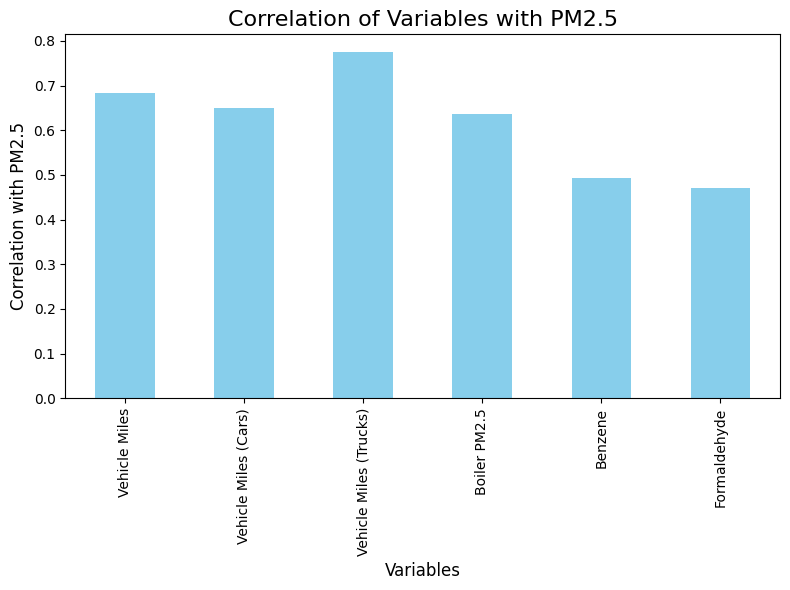

In [33]:

relevant_pollutants = [
    'Fine particles (PM 2.5)', 
    'Boiler Emissions- Total PM2.5 Emissions', 
    'Annual vehicle miles traveled', 
    'Annual vehicle miles traveled (trucks)', 
    'Annual vehicle miles traveled (cars)', 
    'Outdoor Air Toxics - Formaldehyde', 
    'Outdoor Air Toxics - Benzene'
]

# Filter the dataset for the relevant pollutants
filtered_df = df[df['Name'].isin(relevant_pollutants)]

# Get the most recent data for each pollutant by grouping by 'Name' and 'Geo Place Name'
most_recent_df = filtered_df.loc[filtered_df.groupby(['Name', 'Geo Place Name'])['Start_Date'].idxmax()]

# Pivot the data to make each pollutant a column
pivot_df = most_recent_df.pivot(index='Geo Place Name', columns='Name', values='Data Value')

# Create abbreviations for the column names
abbreviations = {
    'Fine particles (PM 2.5)': 'PM2.5',
    'Boiler Emissions- Total PM2.5 Emissions': 'Boiler PM2.5',
    'Annual vehicle miles traveled': 'Vehicle Miles',
    'Annual vehicle miles traveled (trucks)': 'Vehicle Miles (Trucks)',
    'Annual vehicle miles traveled (cars)': 'Vehicle Miles (Cars)',
    'Outdoor Air Toxics - Formaldehyde': 'Formaldehyde',
    'Outdoor Air Toxics - Benzene': 'Benzene'
}

# Rename the columns with abbreviations
pivot_df = pivot_df.rename(columns=abbreviations)

# Compute the correlation matrix for the pivoted data
correlation_matrix = pivot_df.corr()

# Filter the correlation matrix to show only PM2.5 correlations
pm25_correlation = correlation_matrix['PM2.5'].drop('PM2.5')  # Exclude PM2.5 from its own correlation

# Plot the correlation of all variables with PM2.5
plt.figure(figsize=(8, 6))
pm25_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation of Variables with PM2.5', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlation with PM2.5', fontsize=12)


plt.tight_layout()
plt.savefig('pm25_correlation_with_others.png', format='png')


plt.show()



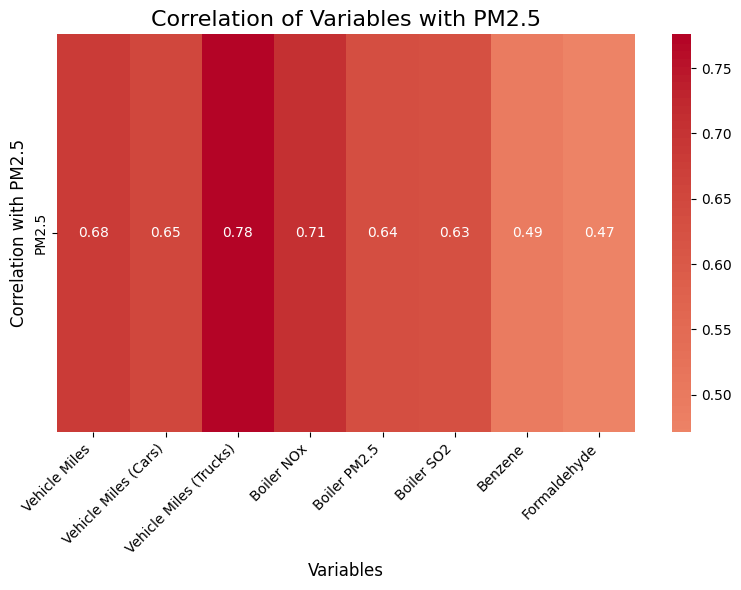

In [37]:
relevant_pollutants = [
    'Fine particles (PM 2.5)', 
    'Boiler Emissions- Total PM2.5 Emissions', 
    'Annual vehicle miles traveled', 
    'Annual vehicle miles traveled (trucks)', 
    'Annual vehicle miles traveled (cars)', 
    'Outdoor Air Toxics - Formaldehyde', 
    'Outdoor Air Toxics - Benzene',
    'Boiler Emissions- Total NOx Emissions',  # Added NOx
    'Boiler Emissions- Total SO2 Emissions'   # Added SO2
]

# Filter the dataset for the relevant pollutants
filtered_df = df[df['Name'].isin(relevant_pollutants)]

# Get the most recent data for each pollutant by grouping by 'Name' and 'Geo Place Name'
most_recent_df = filtered_df.loc[filtered_df.groupby(['Name', 'Geo Place Name'])['Start_Date'].idxmax()]
pivot_df = most_recent_df.pivot(index='Geo Place Name', columns='Name', values='Data Value')

# Create abbreviations for the column names
abbreviations = {
    'Fine particles (PM 2.5)': 'PM2.5',
    'Boiler Emissions- Total PM2.5 Emissions': 'Boiler PM2.5',
    'Annual vehicle miles traveled': 'Vehicle Miles',
    'Annual vehicle miles traveled (trucks)': 'Vehicle Miles (Trucks)',
    'Annual vehicle miles traveled (cars)': 'Vehicle Miles (Cars)',
    'Outdoor Air Toxics - Formaldehyde': 'Formaldehyde',
    'Outdoor Air Toxics - Benzene': 'Benzene',
    'Boiler Emissions- Total NOx Emissions': 'Boiler NOx',  # Abbreviation for NOx
    'Boiler Emissions- Total SO2 Emissions': 'Boiler SO2'   # Abbreviation for SO2
}

# Rename the columns with abbreviations
pivot_df = pivot_df.rename(columns=abbreviations)

# Compute the correlation matrix for the pivoted data
correlation_matrix = pivot_df.corr()

# Extract just the correlations of PM2.5 with other variables
pm25_correlation = correlation_matrix[['PM2.5']].drop('PM2.5')  # Drop PM2.5 from its own correlation

# Create a heatmap of PM2.5's correlations with other variables
plt.figure(figsize=(8, 6))
sns.heatmap(pm25_correlation.T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, center=0)

# Add titles and labels
plt.title('Correlation of Variables with PM2.5', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlation with PM2.5', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right

# Save the heatmap as a PNG file
plt.tight_layout()
plt.savefig('pm25_correlation_heatmap_with_nox_so2.png', format='png')

plt.show()


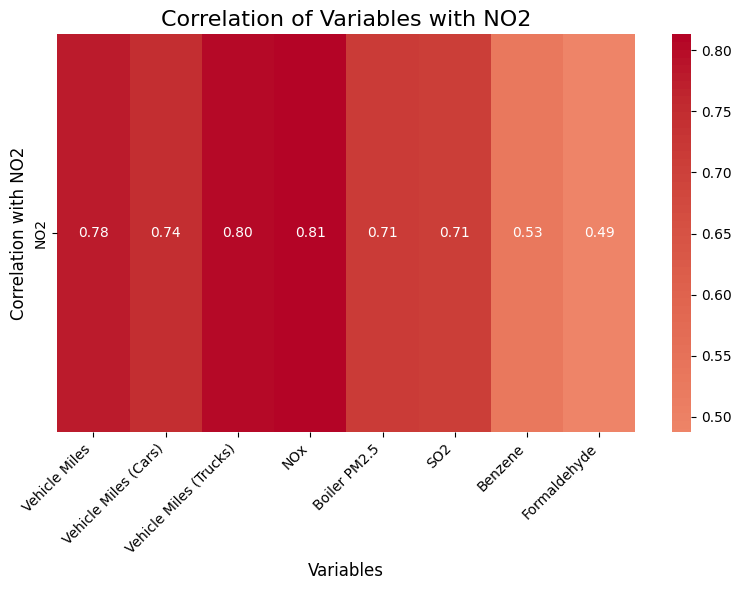

In [39]:
# We're interested in these specific pollutants and metrics, including NOx and SO2
relevant_pollutants = [
    'Nitrogen dioxide (NO2)',  # Focus on NO2 for this heatmap
    'Boiler Emissions- Total PM2.5 Emissions', 
    'Annual vehicle miles traveled', 
    'Annual vehicle miles traveled (trucks)', 
    'Annual vehicle miles traveled (cars)', 
    'Outdoor Air Toxics - Formaldehyde', 
    'Outdoor Air Toxics - Benzene',
    'Boiler Emissions- Total NOx Emissions',  # Added NOx
    'Boiler Emissions- Total SO2 Emissions'   # Added SO2
]

# Filter the dataset for the relevant pollutants
filtered_df = df[df['Name'].isin(relevant_pollutants)]

# Get the most recent data for each pollutant by grouping by 'Name' and 'Geo Place Name'
most_recent_df = filtered_df.loc[filtered_df.groupby(['Name', 'Geo Place Name'])['Start_Date'].idxmax()]

# Pivot the data to make each pollutant a column
pivot_df = most_recent_df.pivot(index='Geo Place Name', columns='Name', values='Data Value')

# Create abbreviations for the column names
abbreviations = {
    'Nitrogen dioxide (NO2)': 'NO2',
    'Boiler Emissions- Total PM2.5 Emissions': 'Boiler PM2.5',
    'Annual vehicle miles traveled': 'Vehicle Miles',
    'Annual vehicle miles traveled (trucks)': 'Vehicle Miles (Trucks)',
    'Annual vehicle miles traveled (cars)': 'Vehicle Miles (Cars)',
    'Outdoor Air Toxics - Formaldehyde': 'Formaldehyde',
    'Outdoor Air Toxics - Benzene': 'Benzene',
    'Boiler Emissions- Total NOx Emissions': 'NOx',  # Abbreviation for NOx
    'Boiler Emissions- Total SO2 Emissions': 'SO2'   # Abbreviation for SO2
}

# Rename the columns with abbreviations
pivot_df = pivot_df.rename(columns=abbreviations)

# Compute the correlation matrix for the pivoted data
correlation_matrix = pivot_df.corr()

# Extract just the correlations of NO2 with other variables
no2_correlation = correlation_matrix[['NO2']].drop('NO2')  # Drop NO2 from its own correlation

# Create a heatmap of NO2's correlations with other variables
plt.figure(figsize=(8, 6))
sns.heatmap(no2_correlation.T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, center=0)

# Add titles and labels
plt.title('Correlation of Variables with NO2', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlation with NO2', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right

plt.tight_layout()
plt.savefig('no2_correlation_heatmap_with_nox_so2.png', format='png')

plt.show()


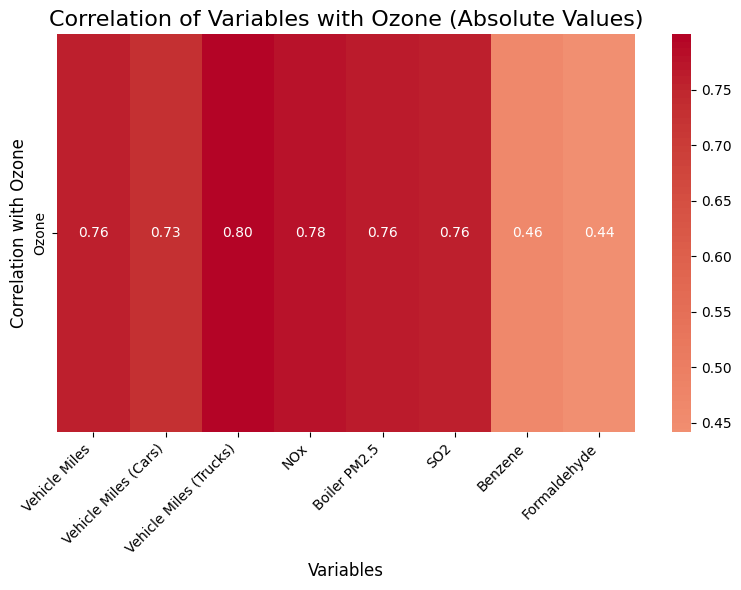

In [44]:
relevant_pollutants = [
    'Ozone (O3)',  # Focus on Ozone for this heatmap
    'Boiler Emissions- Total PM2.5 Emissions', 
    'Annual vehicle miles traveled', 
    'Annual vehicle miles traveled (trucks)', 
    'Annual vehicle miles traveled (cars)', 
    'Outdoor Air Toxics - Formaldehyde', 
    'Outdoor Air Toxics - Benzene',
    'Boiler Emissions- Total NOx Emissions',  # Added NOx
    'Boiler Emissions- Total SO2 Emissions'   # Added SO2
]

filtered_df = df[df['Name'].isin(relevant_pollutants)]

most_recent_df = filtered_df.loc[filtered_df.groupby(['Name', 'Geo Place Name'])['Start_Date'].idxmax()]

pivot_df = most_recent_df.pivot(index='Geo Place Name', columns='Name', values='Data Value')

abbreviations = {
    'Ozone (O3)': 'Ozone',
    'Boiler Emissions- Total PM2.5 Emissions': 'Boiler PM2.5',
    'Annual vehicle miles traveled': 'Vehicle Miles',
    'Annual vehicle miles traveled (trucks)': 'Vehicle Miles (Trucks)',
    'Annual vehicle miles traveled (cars)': 'Vehicle Miles (Cars)',
    'Outdoor Air Toxics - Formaldehyde': 'Formaldehyde',
    'Outdoor Air Toxics - Benzene': 'Benzene',
    'Boiler Emissions- Total NOx Emissions': 'NOx',  # Abbreviation for NOx
    'Boiler Emissions- Total SO2 Emissions': 'SO2'   # Abbreviation for SO2
}

# Rename the columns with abbreviations
pivot_df = pivot_df.rename(columns=abbreviations)

# Compute the correlation matrix for the pivoted data
correlation_matrix = pivot_df.corr()

# Take the absolute value of the correlation matrix to make all correlations positive
correlation_matrix = correlation_matrix.abs()

# Extract just the correlations of Ozone with other variables
ozone_correlation = correlation_matrix[['Ozone']].drop('Ozone')  # Drop Ozone from its own correlation

# Create a heatmap of Ozone's correlations with other variables
plt.figure(figsize=(8, 6))
sns.heatmap(ozone_correlation.T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, center=0)

# Add titles and labels
plt.title('Correlation of Variables with Ozone (Absolute Values)', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlation with Ozone', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right

plt.tight_layout()
plt.savefig('ozone_correlation_heatmap_absolute_values.png', format='png')

plt.show()


<Figure size 1400x1200 with 0 Axes>

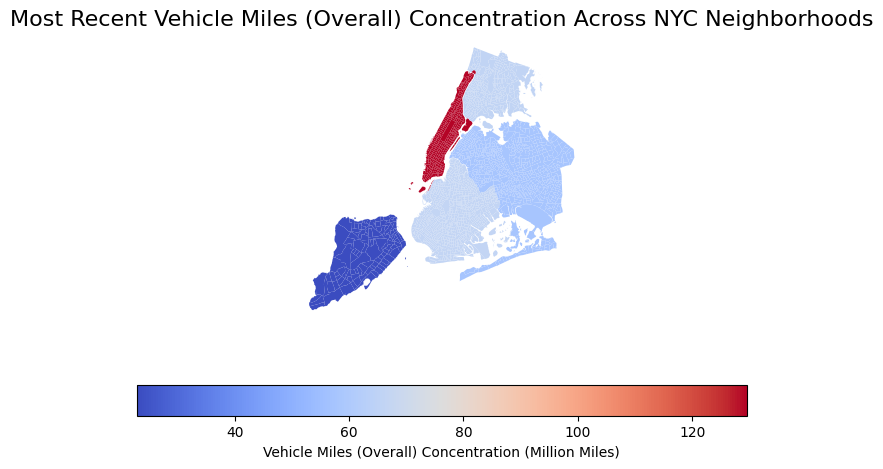

<Figure size 1400x1200 with 0 Axes>

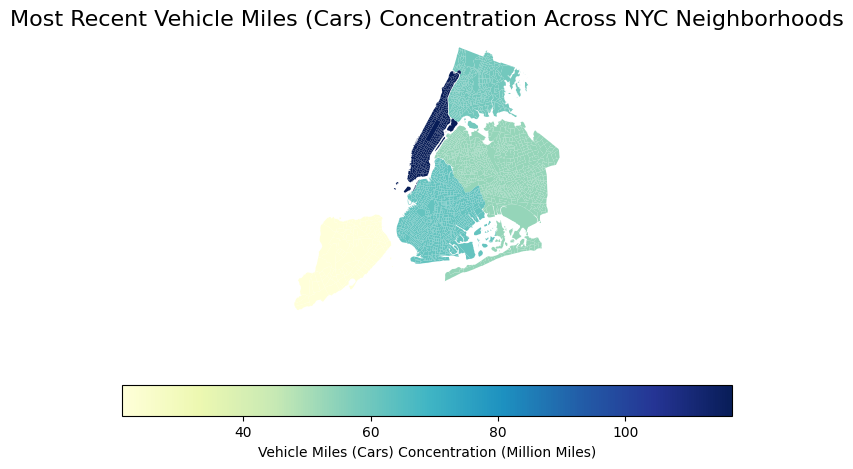

<Figure size 1400x1200 with 0 Axes>

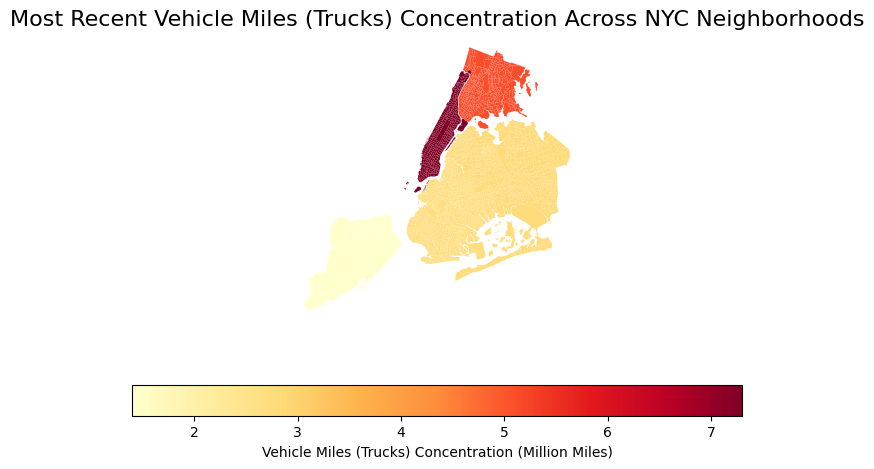

<Figure size 1400x1200 with 0 Axes>

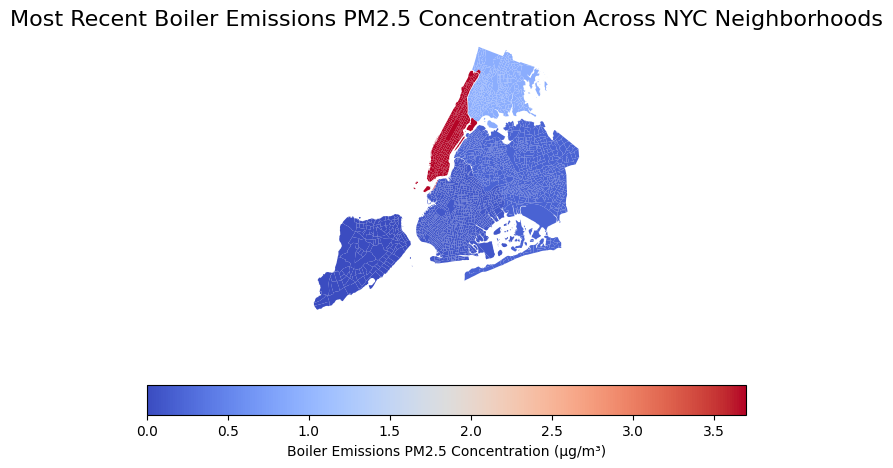

<Figure size 1400x1200 with 0 Axes>

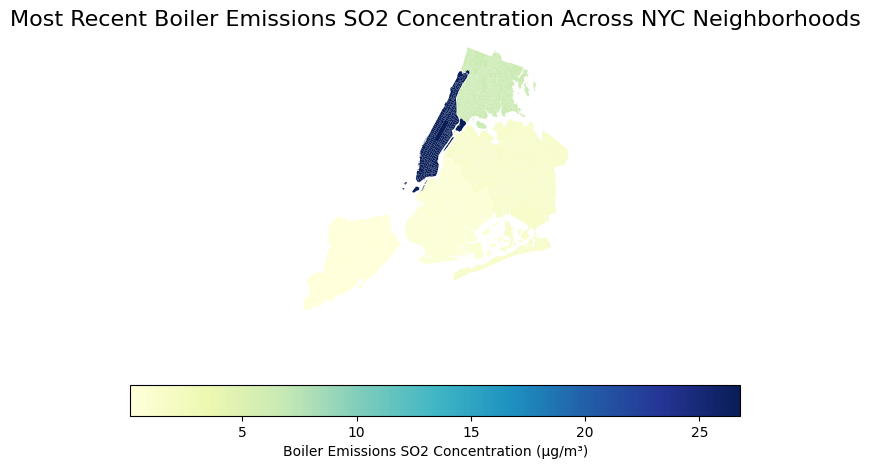

<Figure size 1400x1200 with 0 Axes>

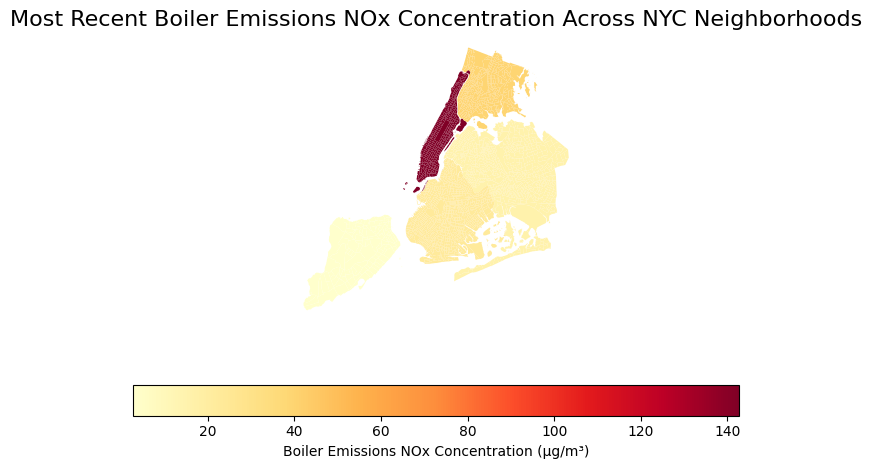

In [45]:
relevant_pollutants = [
    'Annual vehicle miles traveled',  # Vehicle Miles (Overall)
    'Annual vehicle miles traveled (cars)',  # Vehicle Miles (Cars)
    'Annual vehicle miles traveled (trucks)',  # Vehicle Miles (Trucks)
    'Boiler Emissions- Total PM2.5 Emissions',  # Boiler Emissions PM2.5
    'Boiler Emissions- Total SO2 Emissions',  # Boiler Emissions SO2
    'Boiler Emissions- Total NOx Emissions'  # Boiler Emissions NOx
]

# Filter the dataset for the relevant pollutants
filtered_df = df[df['Name'].isin(relevant_pollutants)]

# Get the most recent data for each pollutant by grouping by 'Name' and 'Geo Place Name'
most_recent_df = filtered_df.loc[filtered_df.groupby(['Name', 'Geo Place Name'])['Start_Date'].idxmax()]

# Load the NYC shapefile (adjust file path as needed)
nyc_shapefile = 'C:/Users/tvish/Downloads/FBLA Data Analysis/nyct2020.shp'
gdf = gpd.read_file(nyc_shapefile)

# Function to plot the most recent concentrations for each pollutant
def plot_pollutant_map(pollutant_df, pollutant_name, color_map, output_filename, units):
    # Merge the most recent data for the pollutant with the shapefile
    merged_gdf = gdf.merge(pollutant_df, left_on='BoroName', right_on='Geo Place Name', how='left')

    # Plot the map
    plt.figure(figsize=(14, 12))
    merged_gdf.plot(column='Data Value', cmap=color_map, legend=True,
                    legend_kwds={'label': f"{pollutant_name} Concentration ({units})", 'orientation': "horizontal"})

    plt.axis('off')
    plt.title(f'Most Recent {pollutant_name} Concentration Across NYC Neighborhoods', fontsize=16)
    plt.tight_layout()
    plt.savefig(output_filename, format='png')
    plt.show()

# Plot maps for each of the 6 pollutants

# Vehicle Miles (Overall) in Million Miles
vehicle_miles_df = most_recent_df[most_recent_df['Name'] == 'Annual vehicle miles traveled']
plot_pollutant_map(vehicle_miles_df, 'Vehicle Miles (Overall)', 'coolwarm', 'nyc_vehicle_miles_overall.png', 'Million Miles')

# Vehicle Miles (Cars) in Million Miles
vehicle_miles_cars_df = most_recent_df[most_recent_df['Name'] == 'Annual vehicle miles traveled (cars)']
plot_pollutant_map(vehicle_miles_cars_df, 'Vehicle Miles (Cars)', 'YlGnBu', 'nyc_vehicle_miles_cars.png', 'Million Miles')

# Vehicle Miles (Trucks) in Million Miles
vehicle_miles_trucks_df = most_recent_df[most_recent_df['Name'] == 'Annual vehicle miles traveled (trucks)']
plot_pollutant_map(vehicle_miles_trucks_df, 'Vehicle Miles (Trucks)', 'YlOrRd', 'nyc_vehicle_miles_trucks.png', 'Million Miles')

# Boiler Emissions PM2.5 in µg/m³
boiler_pm25_df = most_recent_df[most_recent_df['Name'] == 'Boiler Emissions- Total PM2.5 Emissions']
plot_pollutant_map(boiler_pm25_df, 'Boiler Emissions PM2.5', 'coolwarm', 'nyc_boiler_pm25.png', 'µg/m³')

# Boiler Emissions SO2 in µg/m³
boiler_so2_df = most_recent_df[most_recent_df['Name'] == 'Boiler Emissions- Total SO2 Emissions']
plot_pollutant_map(boiler_so2_df, 'Boiler Emissions SO2', 'YlGnBu', 'nyc_boiler_so2.png', 'µg/m³')

# Boiler Emissions NOx in µg/m³
boiler_nox_df = most_recent_df[most_recent_df['Name'] == 'Boiler Emissions- Total NOx Emissions']
plot_pollutant_map(boiler_nox_df, 'Boiler Emissions NOx', 'YlOrRd', 'nyc_boiler_nox.png', 'µg/m³')



IndexError: list index out of range

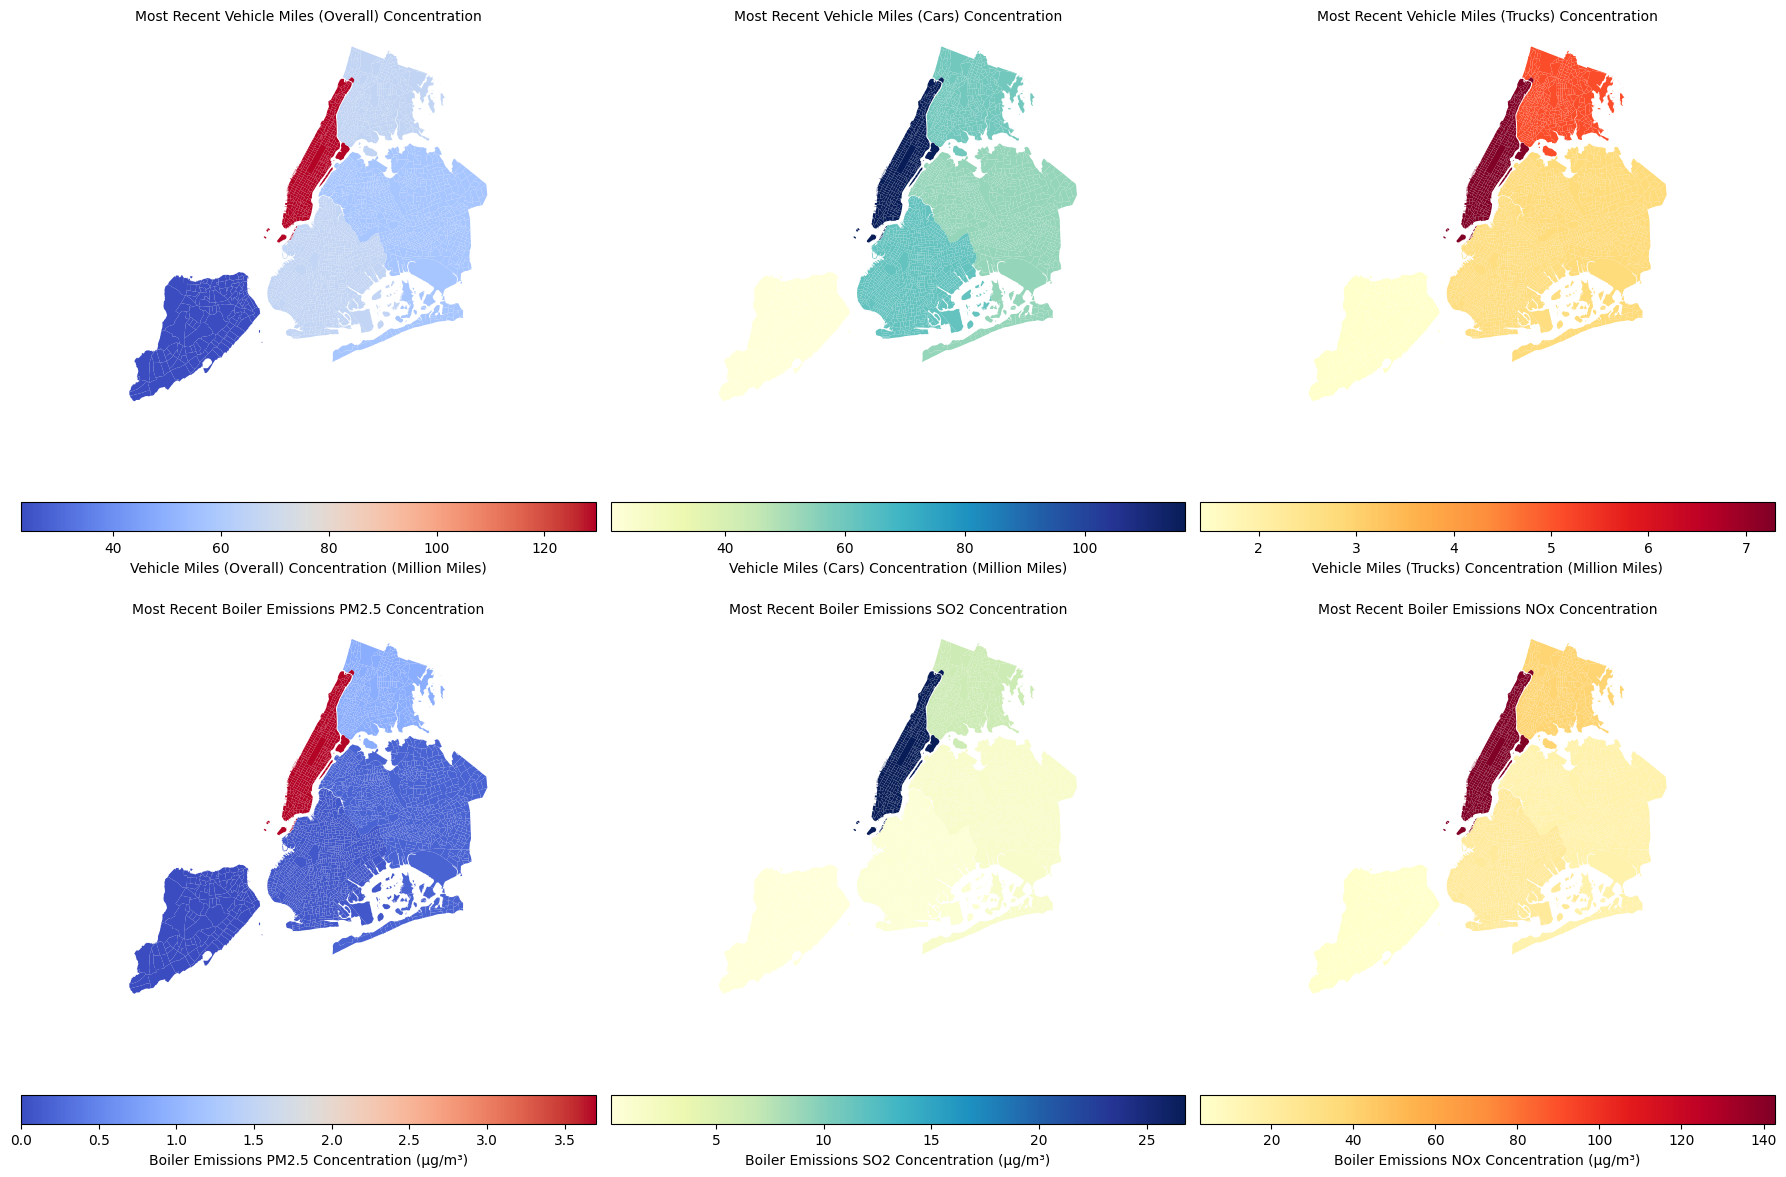

In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your original DataFrame containing all pollutants data

# Step 1: Filter for the relevant pollutants (6 pollutants)
relevant_pollutants = [
    'Annual vehicle miles traveled',  # Vehicle Miles (Overall)
    'Annual vehicle miles traveled (cars)',  # Vehicle Miles (Cars)
    'Annual vehicle miles traveled (trucks)',  # Vehicle Miles (Trucks)
    'Boiler Emissions- Total PM2.5 Emissions',  # Boiler Emissions PM2.5
    'Boiler Emissions- Total SO2 Emissions',  # Boiler Emissions SO2
    'Boiler Emissions- Total NOx Emissions'  # Boiler Emissions NOx
]

# Filter the dataset for the relevant pollutants
filtered_df = df[df['Name'].isin(relevant_pollutants)]

# Get the most recent data for each pollutant by grouping by 'Name' and 'Geo Place Name'
most_recent_df = filtered_df.loc[filtered_df.groupby(['Name', 'Geo Place Name'])['Start_Date'].idxmax()]

# Load the NYC shapefile (adjust file path)
nyc_shapefile = 'C:/Users/tvish/Downloads/FBLA Data Analysis/nyct2020.shp' 
gdf = gpd.read_file(nyc_shapefile)

# Create a function to plot the most recent concentrations for each pollutant
def plot_pollutant_map(pollutant_df, pollutant_name, color_map, units, ax):
    # Merge the most recent data for the pollutant with the shapefile
    merged_gdf = gdf.merge(pollutant_df, left_on='BoroName', right_on='Geo Place Name', how='left')

    # Plot the map
    merged_gdf.plot(column='Data Value', cmap=color_map, legend=True,
                    ax=ax, legend_kwds={'label': f"{pollutant_name} Concentration ({units})", 'orientation': "horizontal"})

    # Remove longitude and latitude axes
    ax.set_axis_off()

    # Add title
    ax.set_title(f'Most Recent {pollutant_name} Concentration', fontsize=10)

# Create the subplot grid
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Vehicle Miles (Overall) in Million Miles
vehicle_miles_df = most_recent_df[most_recent_df['Name'] == 'Annual vehicle miles traveled']
plot_pollutant_map(vehicle_miles_df, 'Vehicle Miles (Overall)', 'coolwarm', 'Million Miles', axs[0, 0])

# Vehicle Miles (Cars) in Million Miles
vehicle_miles_cars_df = most_recent_df[most_recent_df['Name'] == 'Annual vehicle miles traveled (cars)']
plot_pollutant_map(vehicle_miles_cars_df, 'Vehicle Miles (Cars)', 'YlGnBu', 'Million Miles', axs[0, 1])

# Vehicle Miles (Trucks) in Million Miles
vehicle_miles_trucks_df = most_recent_df[most_recent_df['Name'] == 'Annual vehicle miles traveled (trucks)']
plot_pollutant_map(vehicle_miles_trucks_df, 'Vehicle Miles (Trucks)', 'YlOrRd', 'Million Miles', axs[0, 2])

# Boiler Emissions PM2.5 in µg/m³
boiler_pm25_df = most_recent_df[most_recent_df['Name'] == 'Boiler Emissions- Total PM2.5 Emissions']
plot_pollutant_map(boiler_pm25_df, 'Boiler Emissions PM2.5', 'coolwarm', 'µg/m³', axs[1, 0])

# Boiler Emissions SO2 in µg/m³
boiler_so2_df = most_recent_df[most_recent_df['Name'] == 'Boiler Emissions- Total SO2 Emissions']
plot_pollutant_map(boiler_so2_df, 'Boiler Emissions SO2', 'YlGnBu', 'µg/m³', axs[1, 1])

# Boiler Emissions NOx in µg/m³
boiler_nox_df = most_recent_df[most_recent_df['Name'] == 'Boiler Emissions- Total NOx Emissions']
plot_pollutant_map(boiler_nox_df, 'Boiler Emissions NOx', 'YlOrRd', 'µg/m³', axs[1, 2])

# Adjust layout
plt.tight_layout()

# Add colorbars below each graph
for ax in axs.flat:
    # Get the color map used in the plot
    mappable = ax.get_images()[0]
    cbar = fig.colorbar(mappable, ax=ax, orientation='horizontal', pad=0.1)
    cbar.set_ticks([mappable.norm.vmin, (mappable.norm.vmin + mappable.norm.vmax) / 2, mappable.norm.vmax])
    cbar.set_label(mappable.cmap.name, fontsize=8)

# Show the plots
plt.show()


IndexError: list index out of range

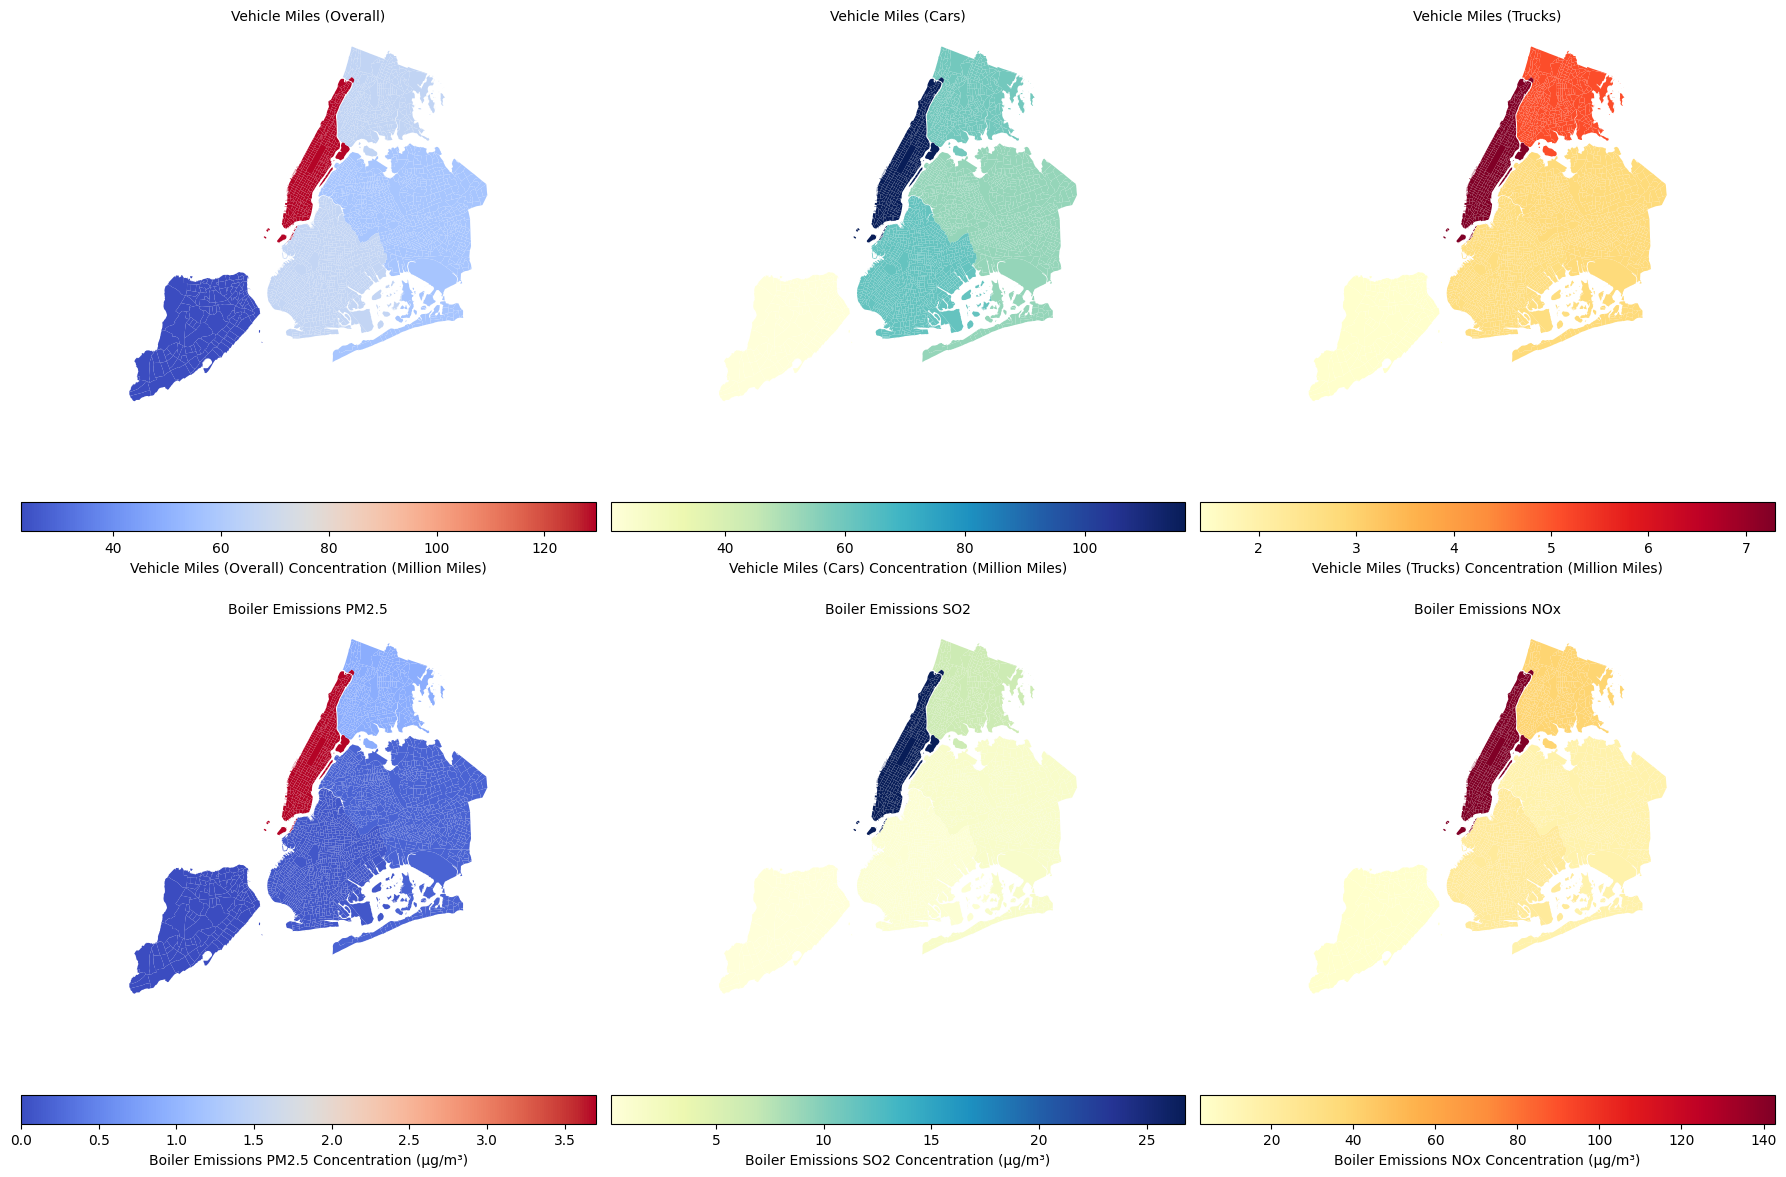

In [57]:

# Filter for the relevant pollutants (6 pollutants)
relevant_pollutants = [
    'Annual vehicle miles traveled',  # Vehicle Miles (Overall)
    'Annual vehicle miles traveled (cars)',  # Vehicle Miles (Cars)
    'Annual vehicle miles traveled (trucks)',  # Vehicle Miles (Trucks)
    'Boiler Emissions- Total PM2.5 Emissions',  # Boiler Emissions PM2.5
    'Boiler Emissions- Total SO2 Emissions',  # Boiler Emissions SO2
    'Boiler Emissions- Total NOx Emissions'  # Boiler Emissions NOx
]

# Filter the dataset for the relevant pollutants
filtered_df = df[df['Name'].isin(relevant_pollutants)]

# Get the most recent data for each pollutant by grouping by 'Name' and 'Geo Place Name'
most_recent_df = filtered_df.loc[filtered_df.groupby(['Name', 'Geo Place Name'])['Start_Date'].idxmax()]

# Load the NYC shapefile (adjust file path)
nyc_shapefile = 'C:/Users/tvish/Downloads/FBLA Data Analysis/nyct2020.shp'  # Replace with actual file path
gdf = gpd.read_file(nyc_shapefile)

# Create a function to plot the most recent concentrations for each pollutant
def plot_pollutant_map(pollutant_df, pollutant_name, color_map, units, ax):
    # Merge the most recent data for the pollutant with the shapefile
    merged_gdf = gdf.merge(pollutant_df, left_on='BoroName', right_on='Geo Place Name', how='left')

    # Plot the map
    merged_gdf.plot(column='Data Value', cmap=color_map, legend=True,
                    ax=ax, legend_kwds={'label': f"{pollutant_name} Concentration ({units})", 'orientation': "horizontal"})

    # Remove longitude and latitude axes
    ax.set_axis_off()

    # Add title
    ax.set_title(f'{pollutant_name}', fontsize=10)

# Create the subplot grid
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Vehicle Miles (Overall) in Million Miles
vehicle_miles_df = most_recent_df[most_recent_df['Name'] == 'Annual vehicle miles traveled']
plot_pollutant_map(vehicle_miles_df, 'Vehicle Miles (Overall)', 'coolwarm', 'Million Miles', axs[0, 0])

# Vehicle Miles (Cars) in Million Miles
vehicle_miles_cars_df = most_recent_df[most_recent_df['Name'] == 'Annual vehicle miles traveled (cars)']
plot_pollutant_map(vehicle_miles_cars_df, 'Vehicle Miles (Cars)', 'YlGnBu', 'Million Miles', axs[0, 1])

# Vehicle Miles (Trucks) in Million Miles
vehicle_miles_trucks_df = most_recent_df[most_recent_df['Name'] == 'Annual vehicle miles traveled (trucks)']
plot_pollutant_map(vehicle_miles_trucks_df, 'Vehicle Miles (Trucks)', 'YlOrRd', 'Million Miles', axs[0, 2])

# Boiler Emissions PM2.5 in µg/m³
boiler_pm25_df = most_recent_df[most_recent_df['Name'] == 'Boiler Emissions- Total PM2.5 Emissions']
plot_pollutant_map(boiler_pm25_df, 'Boiler Emissions PM2.5', 'coolwarm', 'µg/m³', axs[1, 0])

# Boiler Emissions SO2 in µg/m³
boiler_so2_df = most_recent_df[most_recent_df['Name'] == 'Boiler Emissions- Total SO2 Emissions']
plot_pollutant_map(boiler_so2_df, 'Boiler Emissions SO2', 'YlGnBu', 'µg/m³', axs[1, 1])

# Boiler Emissions NOx in µg/m³
boiler_nox_df = most_recent_df[most_recent_df['Name'] == 'Boiler Emissions- Total NOx Emissions']
plot_pollutant_map(boiler_nox_df, 'Boiler Emissions NOx', 'YlOrRd', 'µg/m³', axs[1, 2])

# Adjust layout
plt.tight_layout()

# Add colorbars below each graph
for ax in axs.flat:
    # Get the color map used in the plot
    mappable = ax.get_images()[0]
    cbar = fig.colorbar(mappable, ax=ax, orientation='horizontal', pad=0.1)
    cbar.set_ticks([mappable.norm.vmin, (mappable.norm.vmin + mappable.norm.vmax) / 2, mappable.norm.vmax])
    cbar.set_label(mappable.cmap.name, fontsize=8)

# Save the combined plot as a single PNG file
plt.savefig('nyc_pollutants_combined_map.png', format='png')

# Show the combined plot (optional)
plt.show()

print("All maps have been saved as one PNG file.")


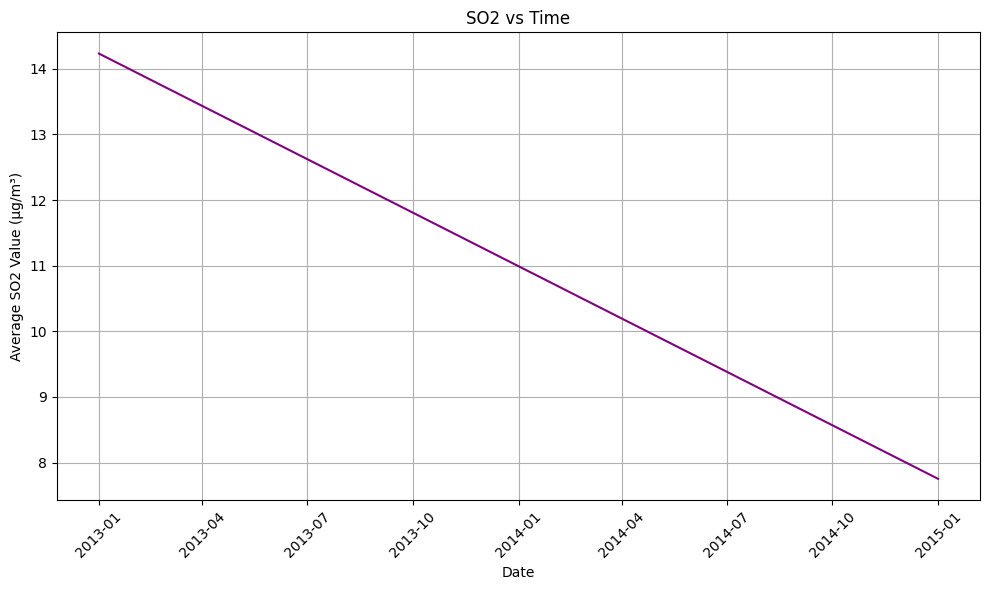

In [63]:
# Filter for SO2 data
so2_df = df[df['Name'] == 'Boiler Emissions- Total SO2 Emissions']

# Group by date and get the mean for each day
so2_df_grouped = so2_df.groupby(so2_df['Start_Date'].dt.date)['Data Value'].mean()

# Plot SO2
plt.figure(figsize=(10, 6))
plt.plot(so2_df_grouped.index, so2_df_grouped.values, label='SO2', color='purple')
plt.title('SO2 vs Time')
plt.xlabel('Date')
plt.ylabel('Average SO2 Value (µg/m³)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig('SO2_vs_Time.png')
plt.show()
